예측원리:
루트노드 부터  시작

각 노드의 질문에 따라 가지를 타고 내려가 

최종 리프노드에 도달하여 예측값을 얻는과정


클래스 확률 추정:

특정데이터가 각 클래스에 속할 확률을 어떻게 계산하는지 설명


규제 하이퍼 파라메터 :

훈련데이터에 너무 과하게 맞춰지는 과대적합(overfiting)을 막기위한 파라메터들을 조정


회귀:

특정 수치를 예측하는 회귀 문제에 적용 가능 - 불순도 대신 MSE 사용


불안정성

작은변화에도 민감하게 반응해서 트리구조가 완전히 달라질수 있다 --> 랜덤포레스트 등장의 배경


노드분할의 기준 : 지니계수 (Gini Impurity)
```
한 그룹(노드)에 얼마나 다른 데이터들이 섞여 있는가? 를 나타내는 지표
0 : 완전순수 : 한그룹에 하나의 클래스 : 상자에 파란공만

질문을 통해서 데이터를 나눌때 다음 그룹들의 지니불순도가 최대한 낮아지도록 하는 질문(지표)
```

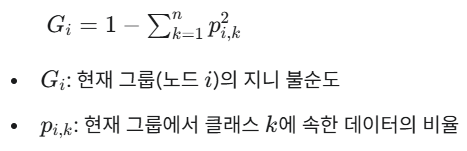

In [96]:
# 노드에 50개의 데이터가 붓꽃 A 40 B 10
# A의 비율 (Pa) = 40 / 50 = 0.8
# B의 비율 (Pb) = 10 / 50 = 0.2
# 지니불순도 1 - (0.8^2 + 0.2^2) = 0.64+0.04 = 0.68   1-0.68 = 0.32

# 결정트리 CART알고리즘
# 1. 모든 가능한 질문 생성 : 하나의 특성(ex 꽃잎의길이) 가능한 모든 임계값(ex 2.25cm 1.5cm) 조합해서 질문
# 2. 불순도 감소량 계산 : 각 질문으로 데이터를 두개로 나눌때 분할전 부모노드의 불순도 - 두 자식의 불순도 가중평균  이 값이 클수록 더 좋은 질문

In [97]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris(as_frame=True)
X = iris.data.iloc[:, 2: ]
y = iris.target

tree = DecisionTreeClassifier()
tree.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [98]:
X.columns

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

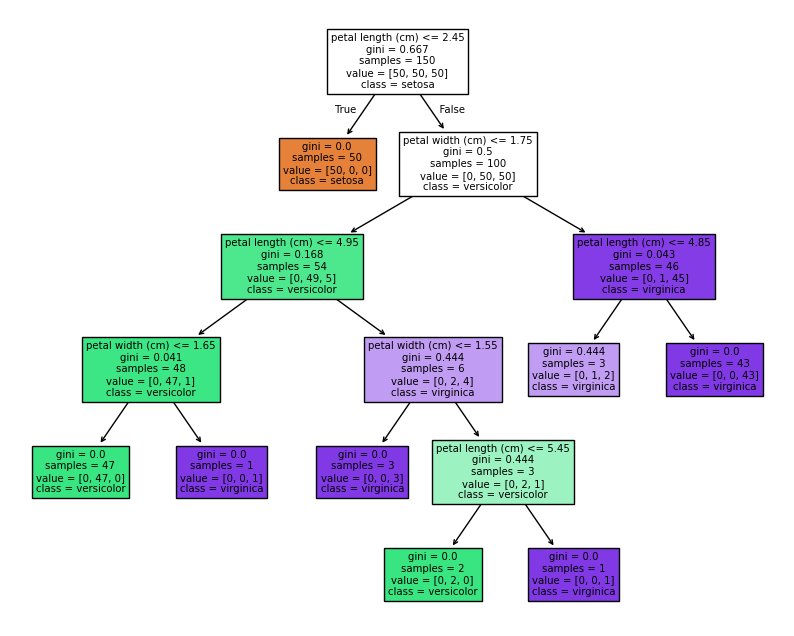

In [99]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(tree, feature_names=X.columns,class_names=iris.target_names, filled=True)
plt.show()

In [100]:
# tree 학습후 가장 중요한 피처들의 정보를 출력 
tree.feature_importances_, tree.feature_names_in_

(array([0.57167834, 0.42832166]),
 array(['petal length (cm)', 'petal width (cm)'], dtype=object))

In [101]:
tree.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [102]:
y.to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

c:\python_src\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


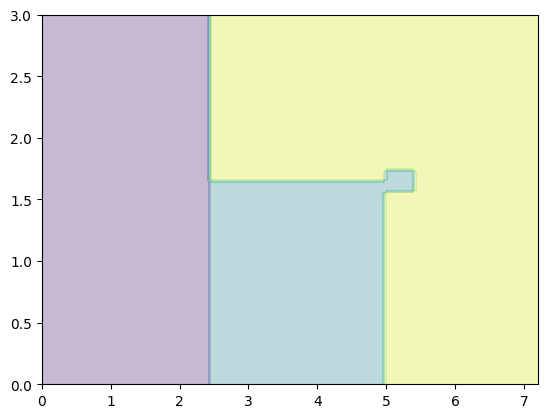

In [103]:
# 전체영역에 대한 예측
import numpy as np
lengths, widths = np.meshgrid(np.linspace(0,7.2,100), np.linspace(0,3,100))
x_iris_all = np.c_[lengths.ravel(),widths.ravel()]
y_pred = tree.predict(x_iris_all).reshape(lengths.shape)
plt.contourf(lengths,widths,y_pred,alpha=0.3)

In [104]:
X.to_numpy()[:,0][y==0]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

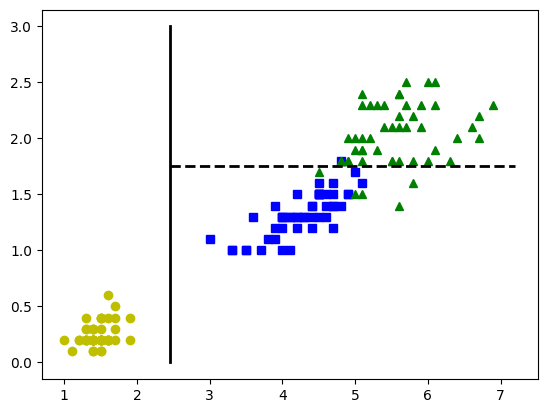

In [105]:
# 실제 데이터 포인트 그리기
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X.to_numpy()[:, 0][y == idx], X.to_numpy()[:, 1][y == idx],
             style, label=f"Iris {name}")

# 더 깊은 트리를 학습시켜 실제 결정선(분기 조건) 가져오기
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X, y)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]

# 결정선 그리기
plt.plot([th0, th0], [0, 3], "k-", linewidth=2) # 첫 번째 분기 (실선)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2) # 두 번째 분기 (파선)


In [109]:
# Tree - 지니계수 지니불순도. 자식노드가 순수상태가 되는 방향으로 계속 트리를 확장
# 스케일링 필요없고
# 중요 피처에 대한 정보
# 과적합이 일어나기 쉬운구조

In [131]:
# 성능측정위한 데이터 분할
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data
y = iris.target

# 데이터 분할
x_train,x_test,y_train,y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)

# 학습
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x_train,y_train)
# 예측
y_hat = tree.predict(x_test)
# 리포트
print(classification_report(y_test, y_hat))

# 중요 feature
tree.feature_importances_ , iris.feature_names

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



(array([0.        , 0.        , 0.57907728, 0.42092272]),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [133]:
# 하이퍼 파라메터 튜닝
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : range(1,10)
}

grid_searchcv =  GridSearchCV(tree, param_grid=param_grid,cv=3,verbose=1, n_jobs= -1)
grid_searchcv.fit(x_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': range(1, 10)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [136]:
print(grid_searchcv.best_params_)
print(grid_searchcv.best_score_)
grid_searchcv.best_estimator_

{'criterion': 'gini', 'max_depth': 3}
0.9583333333333334


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None
